# The Problem
Due to a surveying error, we don't have the unemplyment data for a number of counties for the US census. For an upcoming federal unemployment aid project, we need to provide meaningful values to these counties with missing unemployment data to appropriately identify them as in need of assistance or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
census = pd.read_csv('acs2017_county_data.csv')
print(census.head())
census.shape

   CountyId    State          County  TotalPop    Men   Women  Hispanic  \
0      1001  Alabama  Autauga County     55036  26899   28137       2.7   
1      1003  Alabama  Baldwin County    203360  99527  103833       4.4   
2      1005  Alabama  Barbour County     26201  13976   12225       4.2   
3      1007  Alabama     Bibb County     22580  12251   10329       2.4   
4      1009  Alabama   Blount County     57667  28490   29177       9.0   

   White  Black  Native      ...       Walk  OtherTransp  WorkAtHome  \
0   75.4   18.9     0.3      ...        0.6          1.3         2.5   
1   83.1    9.5     0.8      ...        0.8          1.1         5.6   
2   45.7   47.8     0.2      ...        2.2          1.7         1.3   
3   74.6   22.0     0.4      ...        0.3          1.7         1.5   
4   87.4    1.5     0.3      ...        0.4          0.4         2.1   

   MeanCommute  Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0         25.8     24112         74.1

(3220, 37)

There's 3220 counties and 37 observations about them:

CountyId - County ID

State - State, DC, or Puerto Rico

County - County or county equivalent

TotalPop - Total population

Men - Number of men

Women - Number of women

Hispanic - % of population that is Hispanic/Latino

White - % of population that is white

Black - % of population that is black

Native - % of population that is Native American or Native Alaskan

Asian - % of population that is Asian

Pacific - % of population that is Native Hawaiian or Pacific Islander

Citizen - Number of citizens

Income - Median household income ($)

IncomeErr - Median household income error ($)

IncomePerCap - Income per capita ($)

IncomePerCapErr - Income per capita error ($)

Poverty - % under poverty level

ChildPoverty - % of children under poverty level

Professional - % employed in management, business, science, and arts

Service - % employed in service jobs

Office - % employed in sales and office jobs

Construction - % employed in natural resources, construction, and maintenance

Production - % employed in production, transportation, and material movement

Drive - % commuting alone in a car, van, or truck

Carpool - % carpooling in a car, van, or truck

Transit - % commuting on public transportation

Walk - % walking to work

OtherTransp - % commuting via other means

WorkAtHome - % working at home

MeanCommute - Mean commute time (minutes)

Employed - Number of employed (16+)

PrivateWork - % employed in private industry

PublicWork - % employed in public jobs

SelfEmployed - % self-employed

FamilyWork - % in unpaid family work

Unemployment - Unemployment rate (%)

In [7]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
CountyId            3220 non-null int64
State               3220 non-null object
County              3220 non-null object
TotalPop            3220 non-null int64
Men                 3220 non-null int64
Women               3220 non-null int64
Hispanic            3220 non-null float64
White               3220 non-null float64
Black               3220 non-null float64
Native              3220 non-null float64
Asian               3220 non-null float64
Pacific             3220 non-null float64
VotingAgeCitizen    3220 non-null int64
Income              3220 non-null int64
IncomeErr           3220 non-null int64
IncomePerCap        3220 non-null int64
IncomePerCapErr     3220 non-null int64
Poverty             3220 non-null float64
ChildPoverty        3219 non-null float64
Professional        3220 non-null float64
Service             3220 non-null float64
Office              3220 non-nu

Great! We can see that there are no null/missing values in our dataset 

# Sampling Method
Use stratification sampling across state and population for the county within that state to proportionately weigh the training data and test data.
Set aside 75% as training, 25% as test data.

# Hypothesis
Given the percent of poverty of a county, can we acurrately estimate the unemployment of that county?

# Testing Method 

Run a correlation matrix across the variables to identify which features would provide the most influence on the target variable; shows which variables have covariance. For variabels with covariance, we could either perform a PCA analysis or just pick one of the two covariant variables.

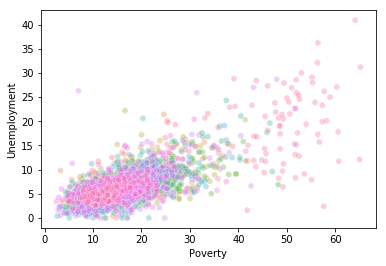

In [33]:
# Run Correlation Matrix

#sns.scatterplot(x=census['Unemployment'], y= census['Income'], hue = census['State'], alpha= 0.5, legend= False)
#sns.scatterplot(x=census['Poverty'], y= census['Income'])
sns.scatterplot(x=census['Poverty'], y= census['Unemployment'], hue = census['State'], alpha= 0.33, legend= False)
#sns.scatterplot(x=census['PrivateWork'],y= census['Income'])
#sns.scatterplot(x=census['Professional'], y= census['Income'])

plt.show()

Fit linear regression to training data, run the test data through the fitted model. 
Plot the fitted test data and the true test data.
Calculate the mean-squared-error, compare the training MSE and test MSE.